In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xmin = -2                 #minimum x value                        
xmax = 2                  #maximum x value
Nx = 101                  #number of x steps
dx = (xmax-xmin)/Nx       #size of x step

tmax = 15                 #end time
dt = 0.02                 #size of timestep
iterations = int(tmax/dt) #number of iterations
 
c = -0.8                   #velocity
CFL = 0.5*c*dt/dx          #CFL

x = np.linspace (xmin, xmax, Nx)            #x values as a vector
t = np.linspace (0, tmax, iterations+1)     #t values as a vector
U = np.zeros((iterations+1, Nx))            #matrix to store approximations - rows: time // columns : space
U[0,:] = np.exp(-0.5*(3*x**2))              #IC

In [3]:
assert abs(CFL)<=1

In [6]:
for n in range (0, iterations): #for time step n...
    if c>0:                     #upwind for positive velocity
        U[n+1,0] = U[n, Nx-1]   #first x val of current row approximated using last x val of the previous row
        for j in range (1, Nx): #upwind for the 2nd to last x values
            U[n+1,j] = (U[n,j] - CFL*(U[n,j]-U[n,j-1]- U[n+1,j-1]))/(1+CFL)
            
    else:                       #downwind for negative velocity
        U[n+1, -1] = U[n,0]     #last x val of current row approximated with first x val of previous row
        for j in range (Nx-2,-1, -1):  #start: 2nd-to-last x val. stop: first x val. direction: backwards
            U[n+1,j] = (U[n,j]- CFL*(U[n,j+1]- U[n,j]+ U[n+1, j+1]))/(1-CFL)

<IPython.core.display.Javascript object>


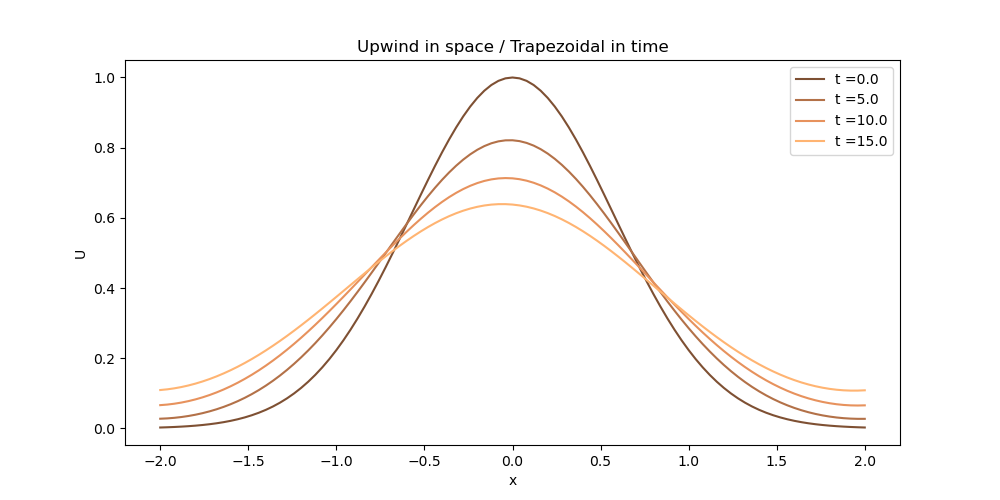

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,5))          #create axes for plot
vcolors = plt.cm.copper(np.linspace(0.4, 0.9, 4))    #colours
timestamps = np.linspace(0, iterations, 4)           #timestamps for which we will create a plot

for i in range (0,len(timestamps)):                  #create plot for each timestamp             
    count = int(timestamps[i])
    ax.plot(x, U[count,:], '-', color = vcolors[i], label = 't ='+str(count*dt))

plt.title ('Upwind in space / Trapezoidal in time')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()